# importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# importing the data set

In [2]:
df = pd.read_csv("Master_Product_Sales_Data.csv")

In [3]:
df.shape

(1037336, 6)

In [4]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Total Sales
0,Product_0993,Whse_J,Category_028,2012/7/27,100,13400
1,Product_0979,Whse_J,Category_028,2012/1/19,500,52500
2,Product_0979,Whse_J,Category_028,2012/2/3,500,52500
3,Product_0979,Whse_J,Category_028,2012/2/9,500,52500
4,Product_0979,Whse_J,Category_028,2012/3/2,500,52500


In [5]:
df.nunique()

Product_Code         2160
Warehouse               4
Product_Category       33
Date                 1729
Order_Demand         3309
Total Sales         17412
dtype: int64

# Cleaning the Dataset

In [6]:
import re

In [7]:
df['Order_Demand'] = df['Order_Demand'].apply(lambda x: re.sub("[^0-9]", "", x))

In [8]:
df['Order_Demand'] = df['Order_Demand'].astype(int)

In [1]:
#df

In [10]:
data_code = df[['Product_Code','Order_Demand', 'Total Sales']].groupby(by=['Product_Code']).sum().sort_values(['Order_Demand'])

In [2]:
#data_code

In [12]:
data_code = data_code.reset_index()

In [13]:
data = data_code[['Order_Demand', 'Total Sales']]

# defining the data set

In [14]:
X = data.iloc[:,:].values

# Using the elbow method to find the optimal number of clusters

C:\Users\araet\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


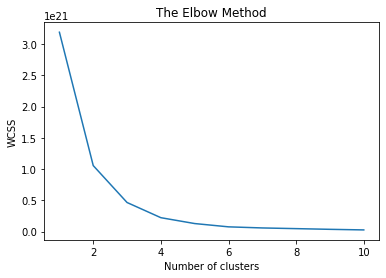

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

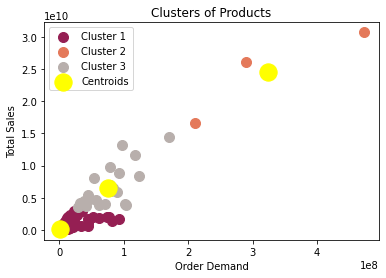

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, cmap = 'tab10', label = 'Cluster 1', color ='#951f53' )
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, cmap = 'tab10', label = 'Cluster 2', color = '#e4795a')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, cmap = 'tab10', label = 'Cluster 3', color = '#b8afac')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Products')
plt.xlabel('Order Demand')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [18]:
cluster_featuers = np.insert(X, 2, y_kmeans, axis = 1)

In [19]:
cluster_featuers = pd.DataFrame(cluster_featuers, columns = ['Order_Demand','Sales','Cluster'])

In [20]:
product_code = data_code['Product_Code']

In [21]:
cluster_featuers['Product_Code'] = data_code['Product_Code']

In [22]:
cluster_featuers

,Order_Demand,Sales,Cluster,Product_Code
0,2,82,0,Product_1703
1,2,276,0,Product_1698
2,3,66,0,Product_0465
3,20,1480,0,Product_0853
4,22,2464,0,Product_0638
...,...,...,...,...
2155,123303000,8384604000,2,Product_1295
2156,169777000,14431045000,2,Product_1341
2157,210651000,16641429000,1,Product_0083
2158,289117000,26020530000,1,Product_1248


In [23]:
cluster_1 = cluster_featuers.loc[cluster_featuers['Cluster']==0]
cluster_2 = cluster_featuers.loc[cluster_featuers['Cluster']==1]
cluster_3 = cluster_featuers.loc[cluster_featuers['Cluster']==2]

In [24]:
cluster_2

,Order_Demand,Sales,Cluster,Product_Code
2157,210651000,16641429000,1,Product_0083
2158,289117000,26020530000,1,Product_1248
2159,472474000,30710810000,1,Product_1359


In [25]:
full_df = pd.merge(df, cluster_featuers, on = 'Product_Code', how='left')

In [26]:
full_df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand_x,Total Sales,Order_Demand_y,Sales,Cluster
0,Product_0993,Whse_J,Category_028,2012/7/27,100,13400,59700,7999800,0
1,Product_0979,Whse_J,Category_028,2012/1/19,500,52500,7332500,769912500,0
2,Product_0979,Whse_J,Category_028,2012/2/3,500,52500,7332500,769912500,0
3,Product_0979,Whse_J,Category_028,2012/2/9,500,52500,7332500,769912500,0
4,Product_0979,Whse_J,Category_028,2012/3/2,500,52500,7332500,769912500,0
...,...,...,...,...,...,...,...,...,...
1037331,Product_1791,Whse_J,Category_006,2016/4/27,1000,108000,56000,6048000,0
1037332,Product_1974,Whse_J,Category_006,2016/4/27,1,61,153,9333,0
1037333,Product_1787,Whse_J,Category_006,2016/4/28,2500,160000,5892500,377120000,0
1037334,Product_0901,Whse_J,Category_023,2016/10/7,50,6750,104950,14168250,0


In [27]:
# cluster_1 = full_df.loc[full_df['cluster']==0]
# cluster_2 = full_df.loc[full_df['cluster']==1]
# cluster_3 = full_df.loc[full_df['cluster']==2]

# Cluster 1

In [28]:
cluster_1

,Order_Demand,Sales,Cluster,Product_Code
0,2,82,0,Product_1703
1,2,276,0,Product_1698
2,3,66,0,Product_0465
3,20,1480,0,Product_0853
4,22,2464,0,Product_0638
...,...,...,...,...
2139,61751000,1852530000,0,Product_1342
2141,73779700,2065831600,0,Product_1016
2142,76703000,1994278000,0,Product_1350
2146,81690200,1388733400,0,Product_1382


In [29]:
cluster_1['Product_Code'].unique()

array(['Product_1703', 'Product_1698', 'Product_0465', ...,
       'Product_1350', 'Product_1382', 'Product_1451'], dtype=object)

In [30]:
cluster_1['Order_Demand'].unique()

array([       2,        3,       20, ..., 76703000, 81690200, 91856000],
      dtype=int64)

# Cluster 2

In [31]:
cluster_2['Product_Code'].unique()

array(['Product_0083', 'Product_1248', 'Product_1359'], dtype=object)

In [32]:
cluster_2['Order_Demand'].unique()

array([210651000, 289117000, 472474000], dtype=int64)

# Cluster 3

In [33]:
cluster_3['Product_Code'].unique()

array(['Product_1361', 'Product_1502', 'Product_1567', 'Product_1403',
       'Product_1263', 'Product_1152', 'Product_1393', 'Product_1570',
       'Product_1377', 'Product_1360', 'Product_1453', 'Product_1480',
       'Product_1294', 'Product_1264', 'Product_1378', 'Product_1287',
       'Product_1274', 'Product_1432', 'Product_1286', 'Product_1245',
       'Product_1241', 'Product_1295', 'Product_1341'], dtype=object)

In [34]:
cluster_3['Order_Demand'].unique()

array([ 28190000,  32672250,  35361000,  37471000,  41760000,  44790000,
        47357000,  53776000,  56322600,  61618000,  70504500,  77835000,
        78714000,  80187000,  83632700,  88715600,  92831000,  97207000,
       101566400, 103537000, 117741000, 123303000, 169777000], dtype=int64)

In [35]:
#full_df.to_csv("Full Sales Data With Clusters.csv", index=False)